# Reinforcement learning for robotics
This is the initial notebook that you will need to fill out through the semester. 
### Setup
First let's make sure that everything is working properly:

In [44]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
assert gym.__version__=='1.0.0',"You need a newer version of gym"
print("Everything seems good")

Everything seems good


### Outline
As teaching a robot how to walk is tricky, you will first test your algorithm on a much simpler task: Balancing an inverted pendulum.
This week, you will:
- Setup a first enviromnent
- Run a random policy
- Modify the distribution of this policy

In [45]:
#create the environment
envname="InvertedPendulum-v5"
env = gym.make_vec(envname,render_mode='rgb_array',vectorization_mode='sync')

This environment is called InvertedPendulum, and is running in the Mujoco simulator. You can check what it can do by reading the [documentation](https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/)

Your first task is to find what are the state space and the action space. Additionally, answer the following questions:
- What is the dimension of the state space?
- What is the dimension of the action space?
- How could you get these dimentions directly in your code?
- When your ran these commands, you should have gotten an array of dimension 2. What does each of the dimension represent?

_Answers_: - What is the dimension of the state space? 4
- What is the dimension of the action space? 1   

In [46]:
obs, info = env.reset()
print("State space dimension:", env.single_observation_space.shape)
print("Action space dimension:", env.single_action_space.shape)
print("Action space low:", env.single_action_space.low)
print("Action space high:", env.single_action_space.high)

state_dim = env.single_observation_space.shape[0]
action_dim = env.single_action_space.shape[0]
num_params = state_dim * action_dim

print("Number of parameters (linear model without bias):", num_params)

State space dimension: (4,)
Action space dimension: (1,)
Action space low: [-3.]
Action space high: [3.]
Number of parameters (linear model without bias): 4


### Visualization
Gymnasium is providing a visualisation function, let's try it

In [47]:
def render_notebook(env,id,title=""):
    clear_output(wait=True)
    plt.imshow(env.render()[id])
    plt.axis('off')
    plt.tight_layout()
    plt.title(title)
    plt.show()
    plt.pause(0.1)

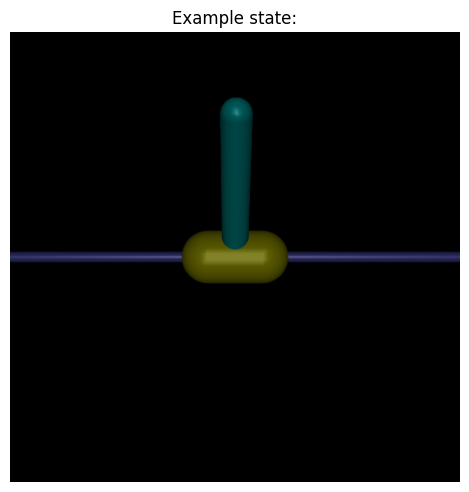

In [48]:
obs, info = env.reset()
render_notebook(env, 0, "Example state:")


Nice right?

### Random policy
Now you will try to implement a random policy: Uniformely chose a random action at each time step.

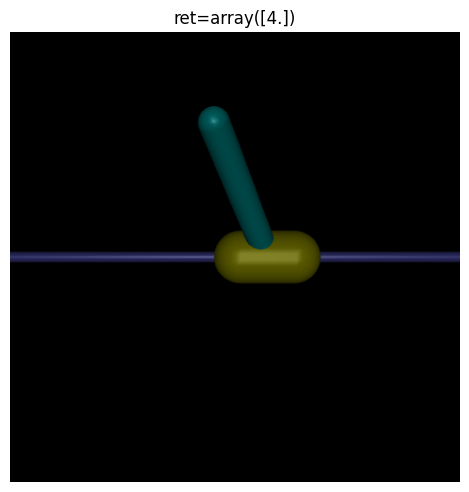

In [49]:
terminated = [False]
env.reset()
ret=0
while not all(terminated):
    action = np.random.uniform(-3, 3, size= env.action_space.shape)
    _,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")

### Other distribution
This policy is quite terrible, so let's try to improve it by using a gaussian distribution instead. Test several standard deviations and see which one works best

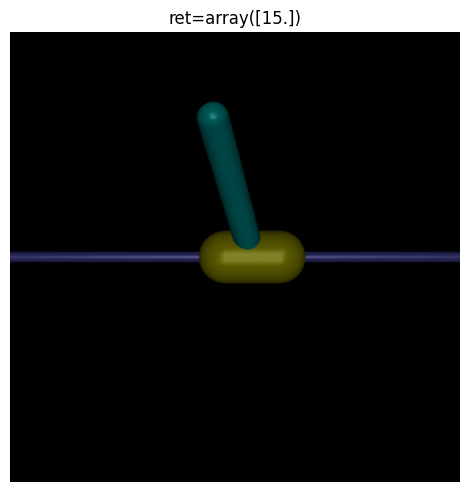

In [50]:

terminated = [False]
std = 0.1
env.reset()
ret=0
while not all(terminated):
    action = np.random.normal(0, std, size=env.action_space.shape)
    _,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")

This concludes this first part of the project, next week we will try to implement a feedback controler in this system. 
In the meantime, feel free to get more confortable with the documentation of gymnasium

### Feedback Policy

FeedBack Policy u=-Kx avec K a determiner

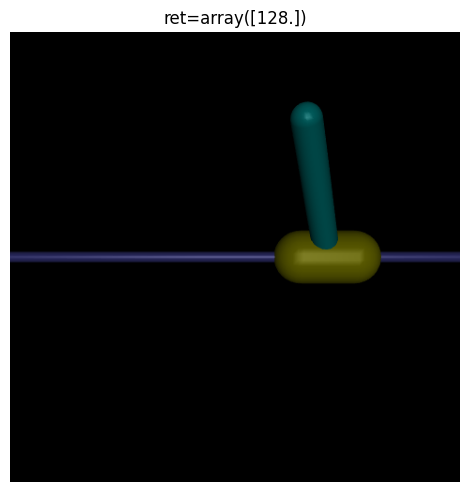

In [51]:
K = np.array([[-1.0 , -2.0, -3.0, -4.0]]) 
terminated = [False]
env.reset()
ret=0
while not all(terminated):
    action = -np.dot(K, obs.T)
    obs,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")
    

In [52]:
def simulate(K):
    obs, info = env.reset()
    terminated = [False]
    ret = 0
    while not all(terminated):
        action = -np.dot(K, obs[0])
        obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        ret += reward
    return ret

bret = -np.inf  
bK = None
num = 1000000
for i in range(num):
    K_cand = np.random.uniform(low=-5, high=5, size=(
                                                     env.action_space.shape[1],
                                                     env.single_observation_space.shape[0]))
    cret = simulate(K_cand)
    if cret > bret:
        bret = cret
        bK = K_cand 
    if np.isclose(cret.item(), 1000.0):
        print(f"Iteration {i}: reward = {cret}, best reward = {bret}")
        break
    print(f"Iteration {i}: reward = {cret}, best reward = {bret}")

print(f"Best K found : {bK}", f"best Reward = {bret}")


Iteration 0: reward = [4.], best reward = [4.]
Iteration 1: reward = [7.], best reward = [7.]
Iteration 2: reward = [7.], best reward = [7.]
Iteration 3: reward = [5.], best reward = [7.]
Iteration 4: reward = [58.], best reward = [58.]
Iteration 5: reward = [45.], best reward = [58.]
Iteration 6: reward = [7.], best reward = [58.]
Iteration 7: reward = [5.], best reward = [58.]
Iteration 8: reward = [12.], best reward = [58.]
Iteration 9: reward = [7.], best reward = [58.]
Iteration 10: reward = [7.], best reward = [58.]
Iteration 11: reward = [18.], best reward = [58.]
Iteration 12: reward = [27.], best reward = [58.]
Iteration 13: reward = [5.], best reward = [58.]
Iteration 14: reward = [4.], best reward = [58.]
Iteration 15: reward = [5.], best reward = [58.]
Iteration 16: reward = [20.], best reward = [58.]
Iteration 17: reward = [14.], best reward = [58.]
Iteration 18: reward = [4.], best reward = [58.]
Iteration 19: reward = [21.], best reward = [58.]
Iteration 20: reward = [3.

In [53]:

obs[0].shape

(4,)

In [54]:
K_cand.shape

(1, 4)

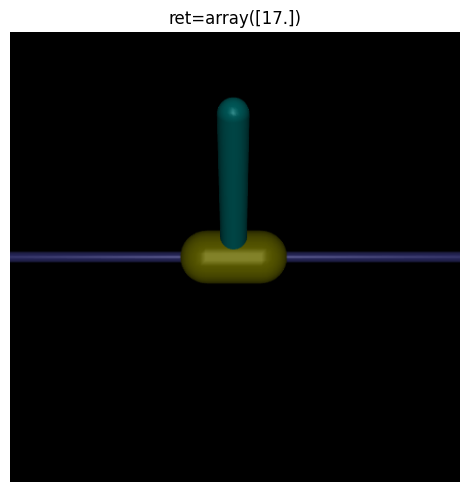

KeyboardInterrupt: 

In [55]:
obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    action = -np.dot(bK, obs.T)
    obs, reward, terminated, truncated, info = env.step(action)
    print(obs)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")

### Reinforcement learning (RL) Week 3 (test) Flo

In [ ]:
#policy : a= -K s   => deterministic, linear, parameterized policy 
#grad compute with finite difference Not WORKING

def episode(K):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    while not all(terminated):
        action = -np.dot(K, obs[0])
        action = np.clip(action, -3.0, 3.0)
        obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        ret += float(reward[0]) 
        
    return ret


def compute_J(K, n_episodes=100):
    total = 0.0
    for i in range(n_episodes):
        total += episode(K)
    return total / n_episodes


def compute_gradJ(K, h=0.01):
    gradJ = np.zeros_like(K)
    for i in range(K.shape[0]):
        for j in range(K.shape[1]):
            K_plus = K.copy()
            K_minus = K.copy()

            K_plus[i, j]  += h
            K_minus[i, j] -= h

            r_plus  = compute_J(K_plus)
            r_minus = compute_J(K_minus)

            gradJ[i, j] = (r_plus - r_minus) / (2.0 * h)

    return gradJ


def training(a, iterations, h):
    K = np.random.uniform(low=-5, high=5, size=(env.action_space.shape[1],env.single_observation_space.shape[0]))
    #K = np.array([[-0.0, -4, -1, -2.3]]).reshape(env.action_space.shape[1],env.single_observation_space.shape[0])
    best_reward = -np.inf
    best_K = K.copy()
    iteration_reached = None
    target = 1000.0
    for i in range(iterations):
        gradJ = compute_gradJ(K, h=h)
        K = K + a * gradJ
        cret = compute_J(K)
        if cret > best_reward:
            best_reward = cret
            best_K = K.copy()
        print(f"Iteration {i}: reward = {cret:.2f}, best reward = {best_reward:.2f}")
        print(K)
        print(gradJ)
        if cret >= target:
            iteration_reached = i
            print(f">>> Cible de reward {target} atteinte à l'itération {i}.")
            break
    print(f"Best K found: {best_K}")
    print(f"Best reward: {best_reward:.2f}")

    return best_K, best_reward, iteration_reached


training(a=0.001, iterations=100000, h=0.00001)

Iteration 0: reward = 3.16, best reward = 3.16
[[-1.39771805  2.64689964 -5.91427589 13.31819985]]
[[-5000.  5000. -1000. 11500.]]
Iteration 1: reward = 3.17, best reward = 3.17
[[-5.39771805  1.14689964 -3.91427589 12.31819985]]
[[-4000. -1500.  2000. -1000.]]
Iteration 2: reward = 3.35, best reward = 3.35
[[-2.39771805  1.64689964 -9.41427589  9.81819985]]
[[ 3000.   500. -5500. -2500.]]
Iteration 3: reward = 3.21, best reward = 3.35
[[-4.89771805  2.64689964 -2.91427589 12.81819985]]
[[-2500.  1000.  6500.  3000.]]
Iteration 4: reward = 3.38, best reward = 3.38
[[-4.89771805 -1.85310036 -7.91427589  7.31819985]]
[[    0. -4500. -5000. -5500.]]
Iteration 5: reward = 3.51, best reward = 3.51
[[-3.89771805 -4.35310036 -6.91427589  6.81819985]]
[[ 1000. -2500.  1000.  -500.]]
Iteration 6: reward = 3.77, best reward = 3.77
[[-2.89771805 -4.35310036 -5.91427589  5.81819985]]
[[ 1000.     0.  1000. -1000.]]
Iteration 7: reward = 3.14, best reward = 3.77
[[  0.10228195 -10.35310036  -8.9142

KeyboardInterrupt: 

In [133]:
obs[0].shape

(4,)

In [ ]:
K = np.random.uniform(low=-3, high=3, size=(env.action_space.shape[1],env.single_observation_space.shape[0]))
gamma = 0.99
alpha = 0.01 
sigma = 0.5
bret = -np.inf  # Initialize best reward to negative infinity
bK = None

def policy(s):
    return np.random.normal(np.dot(K,s),sigma)

def compute_log_gradient(s, a):
    mu = np.dot(K, s)
    return ((a - mu) * s / sigma**2) 

for episode in range(5000):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    obss,actions,rewards=[],[],[]
    while not all(terminated):
        s = obs[0]
        action = policy(s)
        action = np.clip(action, -3.0, 3.0)
        next_obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        obss.append(s)
        actions.append(action)  
        rewards.append(reward)
        ret += reward
        obs = next_obs

    if ret >= bret:
        bret = ret 
        bK = K.copy

    returns = np.zeros(len(rewards))
    G = 0
    for t in reversed(range(len(rewards))):
        G = rewards[t] + gamma * G
        returns[t] = G
    
    alpha = 0.0005 / (1 + 0.00005 * episode)
    
    for t in range(len(obss)):
        grad = compute_log_gradient(obss[t], actions[t])  # Gradient of log-probability
        K += alpha * grad * returns[t]  # Gradient ascent

    print(f"Episode {episode}, Total Reward: {ret}, Best Reward: {bret}, K:{K}" )



/var/folders/nx/v5kfjhrx1n5g9q56qrsnwz9h0000gn/T/ipykernel_50856/3100020574.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returns[t] = G


Episode 0, Total Reward: [31.], Best Reward: [31.], K:[[ 2.37880505  0.87853891 -1.92437001  1.90278751]]
Episode 1, Total Reward: [40.], Best Reward: [40.], K:[[ 2.37727112  0.87693981 -1.86529856  1.74923274]]
Episode 2, Total Reward: [47.], Best Reward: [47.], K:[[ 2.37317236  0.8756256  -1.85688892  1.7055422 ]]
Episode 3, Total Reward: [31.], Best Reward: [47.], K:[[ 2.37301814  0.87458045 -1.85943726  1.70488969]]
Episode 4, Total Reward: [38.], Best Reward: [47.], K:[[ 2.37233359  0.87404219 -1.81710514  1.60134785]]
Episode 5, Total Reward: [94.], Best Reward: [94.], K:[[ 2.3717026   0.89060059 -1.76792224  1.58413133]]
Episode 6, Total Reward: [33.], Best Reward: [94.], K:[[ 2.37314538  0.8942147  -1.75423893  1.57948731]]
Episode 7, Total Reward: [26.], Best Reward: [94.], K:[[ 2.37281626  0.89197675 -1.74655234  1.54604459]]
Episode 8, Total Reward: [34.], Best Reward: [94.], K:[[ 2.37263876  0.89248686 -1.71823554  1.48169159]]
Episode 9, Total Reward: [29.], Best Reward: [

In [ ]:
obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    s = obs[0]  # (4,)
    action = np.dot(bK, s)  # => shape (1,)
    action = np.clip(action, -3, 3)
    
    obs, reward, terminated, truncated, info = env.step([action])
    terminated = terminated | truncated
    
    ret += reward
    render_notebook(env, 0, f"{ret=}")

TypeError: unsupported operand type(s) for *: 'builtin_function_or_method' and 'float'

### Reinforcement learning (RL) Week 3 (test) Selim

In [214]:
state_dim = 4
action_dim = 1

# Initialize policy parameters
theta = np.random.randn(state_dim,action_dim ) * 0.01
alpha = 0.01  # Learning rate
gamma = 0.99  # Discount factor
best_reward = -np.inf  # Initialize best reward to negative infinity
best_theta = None  # Initialize best theta

# linear/gaussian policy
def policy(state):
    mean_action = np.dot(state, theta).item()
    return np.random.normal(mean_action, scale=0.2)

def compute_log_gradient(state, action):
    mean_action = np.dot(state, theta)  # Scalar value
    return (action - mean_action) * state.reshape(-1, 1)  # Reshape state to (4, 1)  # Gradient of log-probability for Gaussian policy

# Training loop
for episode in range(5000):
    state, _ = env.reset()
    states, actions, rewards = [], [], []
    total_reward = 0
    done = False

    while not done:
        action_scalar = np.clip(policy(state), -3, 3)  # Get action from the policy
        action = np.array([[action_scalar]])  # Reshape to (1, 1)
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated

        # Store trajectory
        states.append(state)
        actions.append(action_scalar)  # Store scalar action for gradient calculation
        rewards.append(reward)
        
        total_reward += reward
        state = next_state

    # Update best theta if this episode's reward is the highest so far
    if total_reward >= best_reward:
        best_reward = total_reward
        best_theta = theta.copy()  # Save a copy of the current theta

    # Compute returns
    returns = np.zeros(len(rewards))
    G = 0
    for t in reversed(range(len(rewards))):
       G = rewards[t] + gamma * G
       returns[t] = G
    alpha = 0.0005 / (1 + 0.00005 * episode)  # Decay learning rate 
    # Policy gradient update
    for t in range(len(states)):
       grad = compute_log_gradient(states[t], actions[t])  # Gradient of log-probability
       theta += alpha * grad * returns[t]  # Gradient ascent

    print(f"Episode {episode}, Total Reward: {total_reward}, Best Reward: {best_reward}, theta:{theta}" )
# Save trained parameters
theta = best_theta
np.save('trained_theta.npy', theta)

/var/folders/nx/v5kfjhrx1n5g9q56qrsnwz9h0000gn/T/ipykernel_50856/1688170494.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returns[t] = G


Episode 0, Total Reward: [15.], Best Reward: [15.], theta:[[-0.01338899]
 [ 0.01083982]
 [-0.00777849]
 [ 0.00660537]]
Episode 1, Total Reward: [21.], Best Reward: [21.], theta:[[-0.01340983]
 [ 0.01089553]
 [-0.00807993]
 [ 0.0073773 ]]
Episode 2, Total Reward: [16.], Best Reward: [21.], theta:[[-0.01339928]
 [ 0.01086564]
 [-0.00820357]
 [ 0.00754304]]
Episode 3, Total Reward: [10.], Best Reward: [21.], theta:[[-0.01339795]
 [ 0.01085768]
 [-0.00810857]
 [ 0.00725943]]
Episode 4, Total Reward: [10.], Best Reward: [21.], theta:[[-0.01337731]
 [ 0.01079505]
 [-0.00789465]
 [ 0.00669574]]
Episode 5, Total Reward: [11.], Best Reward: [21.], theta:[[-0.01339893]
 [ 0.01076026]
 [-0.00778798]
 [ 0.00630094]]
Episode 6, Total Reward: [15.], Best Reward: [21.], theta:[[-0.01335106]
 [ 0.01065679]
 [-0.00784807]
 [ 0.00622324]]
Episode 7, Total Reward: [15.], Best Reward: [21.], theta:[[-0.0133258 ]
 [ 0.01059002]
 [-0.00786103]
 [ 0.00605513]]
Episode 8, Total Reward: [17.], Best Reward: [21

KeyboardInterrupt: 

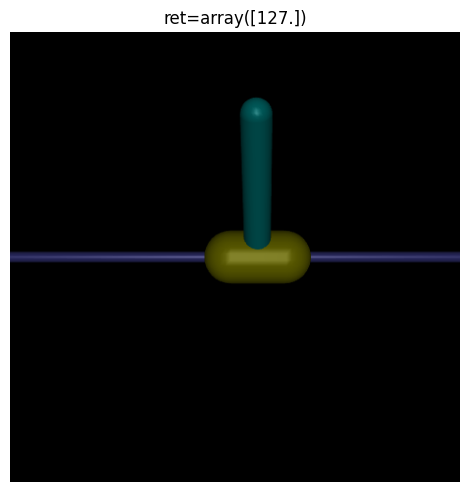

KeyboardInterrupt: 

In [188]:
# Load trained parameters
theta = np.load('trained_theta.npy')

obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    action_scalar = policy(obs)  # Get action from the trained policy
    action = np.array([[action_scalar]])
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")